# Installatie

In [21]:
# Lorem ipsum dolor sit amet

# Bag of words
Bag-of-Words (BoW) is een eenvoudige techniek om tekst om te zetten in numerieke vorm, maar het heeft een aantal beperkingen, vooral bij het vastleggen van betekenis en context. Bij de one-hot encoding representeren we elk woord als een unieke vector met alleen nullen en een enkele 1 op de positie die overeenkomt met dat woord in de woordenschat.

Bijvoorbeeld, stel we hebben de volgende woordenlijst (vocabulaire):

In [17]:
["koning", "koningin", "man", "vrouw", "troon"]  

['koning', 'koningin', 'man', 'vrouw', 'troon']

Dan zou de one-hot encoding er als volgt uitzien:

In [19]:
koning    = [1, 0, 0, 0, 0]  
koningin  = [0, 1, 0, 0, 0]  
man       = [0, 0, 1, 0, 0]  
vrouw     = [0, 0, 0, 1, 0]  
troon     = [0, 0, 0, 0, 1]  


Het probleem met deze manier van werken is dat er geen context of betekenis aan woorden kunnen worden meegegeven. Koning en koningin staan qua betekenis dicht bij elkaar, maar dat is uit deze representatie niet duidelijk. Bovendien heb je even lange vectoren nodig als het aantal woorden in je woordenlijst: dat is niet schaalbaar voor echte talen.

# Embeddings
Word2Vec lost deze problemen op door woordvectoren te leren die in een lagere dimensie liggen (bijv. 300 getallen i.p.v. 100.000) én die betekenisvolle relaties tussen woorden behouden.

https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673

In [2]:
from gensim.models.word2vec import Word2Vec
import gensim.downloader as api

corpus = api.load('text8')  # download the corpus and return it opened as an iterable

## Word2Vec

We willen idealiter een vector die bepaalde aspecten van een woord kan capteren. Bekijk volgend fictief voorbeeld:

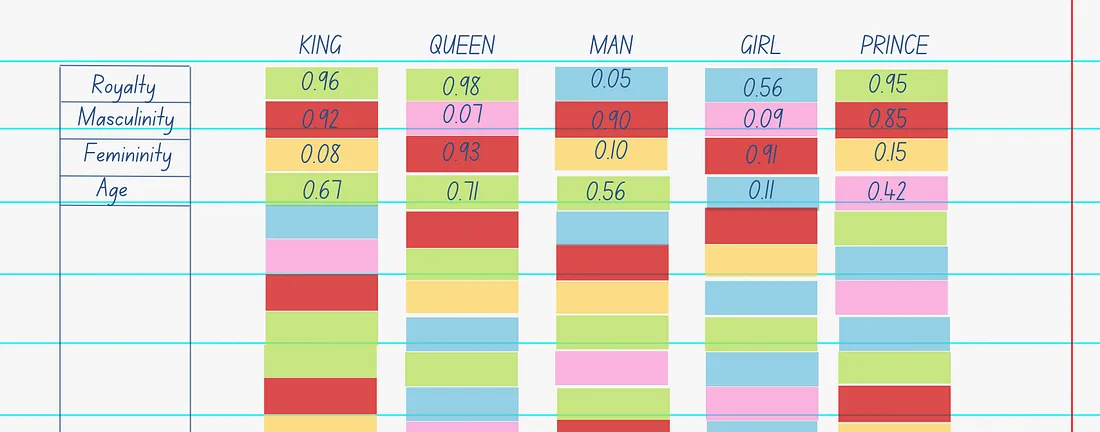

In [3]:
# Word2Vec is een model dat in 2013 werd ontwikkeld door onderzoekers van Google
model = Word2Vec(sentences=corpus, vector_size=50, window=5, min_count=1, workers=4)

In [20]:
# Toon embedding van een woord
print(model.wv["computer"])  # Vector van het woord "computer"

[-0.97972935 -0.16127056 -2.0213418   0.7257336  -0.27811304  0.17307028
 -2.9429724  -2.3600085  -1.5501801  -0.28407755 -1.1292632  -2.6970549
  2.2949438   0.01484943  1.2598822   0.09631044  2.4952824  -3.6912417
  1.0125116  -4.0748024  -2.2396746  -0.3801773   2.2791185   0.888688
 -1.8170472   3.3351717  -0.60776365  1.428341   -2.8559945   0.86236846
  3.700119   -2.8739705  -4.367905   -2.2165449  -2.2175846   4.083833
 -2.8807957   1.2017198   1.6119623   0.27080926  1.6011223  -0.9463345
 -0.9372419  -6.3074684  -0.70452905  1.2304136  -0.9283846  -0.4993044
  2.3378806  -0.734455  ]


In [5]:
king_vector = model.wv["king"]
man_vector = model.wv["man"]
woman_vector = model.wv["woman"]
queen_vector = model.wv['queen']

new_vector = king_vector - man_vector + woman_vector
print(new_vector)

[ 1.2592733   2.6539087   1.5162888  -1.4211051   1.575665    2.1897218
  4.8259287   1.19648    -0.3830219   4.51222     0.69932353 -1.1608715
  0.128538    3.1240306   0.02062076  0.45214462  1.1758074  -3.682527
  0.11617422  0.95814276  2.790493   -5.480804    2.9212184   4.5855007
  3.0858772  -0.2173748   1.0839484  -0.29291636 -0.4406073  -0.8882041
 -2.4193082   4.0126343   2.1298356  -0.6562803   0.08731651 -2.8283978
 -1.048831   -1.9635408   0.5847783  -0.37046397  0.04954493 -1.6098644
  5.207791    1.5065513   3.1482098   0.92398775  4.0127106   1.4328624
 -3.7644553  -0.28270188]


### Hoe is dit model gemaakt ?
Je kan dit model voorstel als een opeenvolging van input naar output.

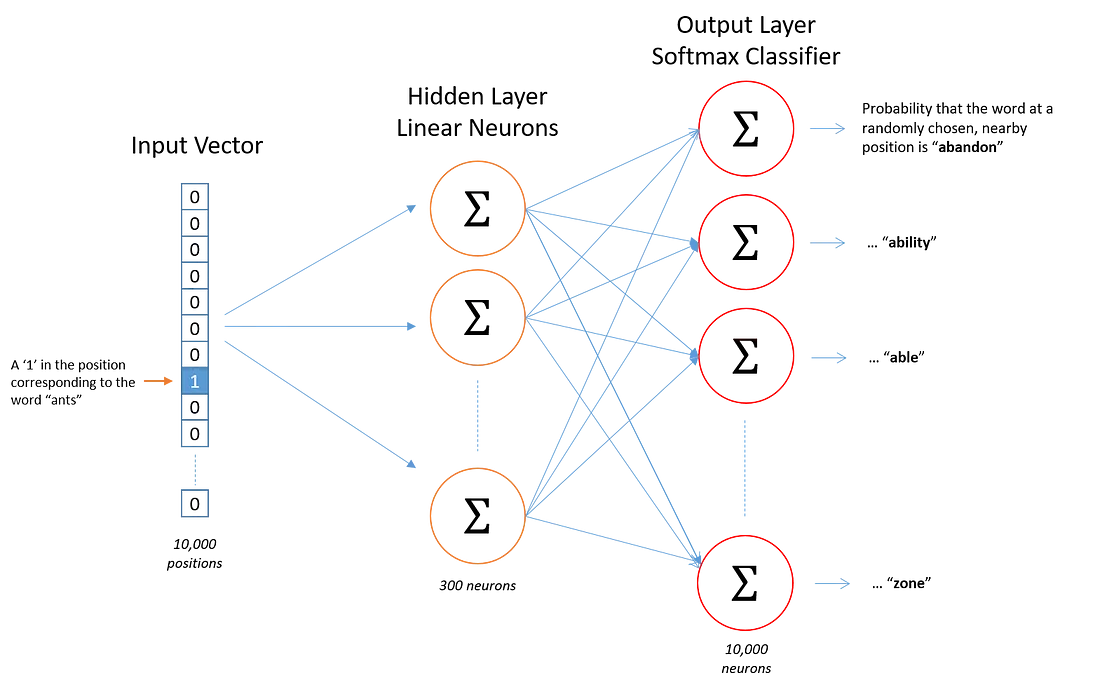

Als input is elk woord gecodeerd volgens zijn positie in de tekst. De oranje cellen hierboven spelen elk de rol van een dimensie van de uiteindelijke vectorruimte waarnaar we de data willen omzetten. In dit geval 300. De output cellen in rood, geven aan of dit woord overeenkomt met een aantal op voorhand gedefinieerde woorden. Dit is een voorbeeld van een neuraal netwerk.

Link naar een voorbeeld: https://playground.tensorflow.org 

### Wat kun je met het getraind model doen ?
Het getraind model heeft een vorm van betekenis geleerd: woorden die 'gelijkaardig' zijn in betekenis, liggen 'dicht bij elkaar. Dat dicht bij elkaar kunnen we uitrekenen:

In [6]:
similarity_score = model.wv.similarity('computer', 'graphics')
print(similarity_score)

0.7619426


Bovendien komt 'dicht bij mekaar' echt overeen met wat je in 2D of 3D al kent voor meetkundige hoeken:

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

In [11]:
new_vec_col = new_vector.reshape(1,-1) # wisselen van rijvector naar kolomvector
queen_vec_col = queen_vector.reshape(1,-1)

In [14]:
similarity_score = cosine_similarity(new_vec_col, queen_vec_col)
similarity_score

array([[0.74248785]], dtype=float32)

In [16]:
import numpy as np

def cosine_similarity(vec1, vec2):
    dot_product = np.dot(vec1, vec2) # dit vermenigvuldigt elementsgewijs en telt alles daarna op. Geeft een scalair als resultaat
    
    # de vectoren moeten worden genormeerd
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    
    # Similarity
    similarity = dot_product / (norm_vec1 * norm_vec2)
    
    return similarity


# je eigen functie gebruiken:
similarity_score = cosine_similarity(new_vector, queen_vector)

print(f"Cosine Similarity: {similarity_score:.6f}")


Cosine Similarity: 0.742488


Prentje cosinusregel invoegen

In [56]:
model_small = Word2Vec(sentences=corpus, vector_size=10, window=4, min_count=1, workers=4)

In [57]:
sentence = ["the", "queen", "does", "not", "like", "art", 'but', 'the', 'king', 'does']

In [58]:
embedding_dim = model_small.vector_size
print(embedding_dim)

10


# Attention is all you need

https://jalammar.github.io/illustrated-transformer/

Deep learning models hadden op zich nog niet genoeg kracht om vlot tekst te kunnen verwerken. Het zou duren tot een nieuwe innovatie in 2016 hier verandering in bracht, door in de architectuur van een neuraal netwerk een vorm van geheugen in te bouwen. Dit noemen we 'attention'.

## Positional awareness

In [59]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [60]:
# Sample sentence represented as word embeddings (3 words, 4-dimensional vectors)
input_sequence = torch.tensor([[0.1, 0.2, 0.3, 0.4],   # Word 1
                               [0.5, 0.6, 0.7, 0.8],   # Word 2
                               [0.9, 1.0, 1.1, 1.2]])  # Word 3
input_sequence = input_sequence.unsqueeze(0)  # Add batch dimension (1, 3, 4)
print(input_sequence)

tensor([[[0.1000, 0.2000, 0.3000, 0.4000],
         [0.5000, 0.6000, 0.7000, 0.8000],
         [0.9000, 1.0000, 1.1000, 1.2000]]])


In [61]:
word_vectors = torch.tensor([model_small.wv[word] for word in sentence])  # Shape: (sequence_length, embedding_dim)

# Add batch dimension: (1, sequence_length, embedding_dim)
input_sequence = word_vectors.unsqueeze(0)

Hieronder een simpel neuraal netwerk, zonder woordvolgorde:

In [62]:
# Simple Feedforward Neural Network (ignores position)
class SimpleNN(nn.Module):
    def __init__(self, embedding_dim):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(embedding_dim, embedding_dim)  # Transform input embeddings

    def forward(self, x):
        return self.fc(x)
    
simple_nn = SimpleNN(embedding_dim=embedding_dim)
output_simple = simple_nn(input_sequence)
print("Simple Neural Network Output (ignores position):\n", output_simple.detach().numpy())

Simple Neural Network Output (ignores position):
 [[[ 0.2622085  -0.50744885  1.5795959  -2.837768   -1.5896791
    0.43204102  1.439615   -1.1108838   0.54497105  0.95784384]
  [ 0.20425037 -2.024356    3.3646274  -0.3357347   1.6543882
   -0.86329     2.8414524   1.9551563   1.9005804  -0.7362875 ]
  [ 1.4884925  -1.5243424   2.7438436  -1.9110515   1.9032726
    0.42675006  0.01718238 -2.0329483   0.26862955  2.5758812 ]
  [ 2.8401046  -1.3543127   2.2574387  -2.7912338   0.09134391
   -2.1522987   2.1534991  -1.4965233   1.5982327   0.8623293 ]
  [-1.2165148  -0.86771137 -0.48673913 -0.27321178  0.17201924
    0.7089565  -1.4812806  -2.6945508  -2.0063076   2.281607  ]
  [-0.38420677  1.3746842  -1.2117188  -0.40340236  0.0255934
   -1.4608344  -0.04163045 -0.8285116  -0.66774976 -0.50401765]
  [ 1.7276875  -1.2019644   0.86152875 -3.251994   -1.6447337
   -0.81976575  1.4582276  -1.4536304   0.10557047  1.0801907 ]
  [ 0.2622085  -0.50744885  1.5795959  -2.837768   -1.5896791
    

In [63]:
# Transformer with Positional Encoding
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=10):
        super(PositionalEncoding, self).__init__()

        # Create a matrix of shape (max_len, d_model)
        position = torch.arange(max_len).unsqueeze(1)  # Shape (max_len, 1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))

        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)  # Even indices
        pe[:, 1::2] = torch.cos(position * div_term)  # Odd indices

        self.pe = pe.unsqueeze(0)  # Shape (1, max_len, d_model)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

# Transformer-like Model with Positional Encoding
class TransformerModel(nn.Module):
    def __init__(self, d_model):
        super(TransformerModel, self).__init__()
        self.positional_encoding = PositionalEncoding(d_model)
        self.fc = nn.Linear(d_model, d_model)  # Transform embeddings

    def forward(self, x):
        x = self.positional_encoding(x)
        return self.fc(x)

# Instantiate model
transformer = TransformerModel(d_model=embedding_dim)

# Pass input through model
output_transformer = transformer(input_sequence)

# Print Results
print("Simple Neural Network Output (ignores position):\n", output_simple.detach().numpy())
print("\nTransformer with Positional Encoding Output:\n", output_transformer.detach().numpy())


Simple Neural Network Output (ignores position):
 [[[ 0.2622085  -0.50744885  1.5795959  -2.837768   -1.5896791
    0.43204102  1.439615   -1.1108838   0.54497105  0.95784384]
  [ 0.20425037 -2.024356    3.3646274  -0.3357347   1.6543882
   -0.86329     2.8414524   1.9551563   1.9005804  -0.7362875 ]
  [ 1.4884925  -1.5243424   2.7438436  -1.9110515   1.9032726
    0.42675006  0.01718238 -2.0329483   0.26862955  2.5758812 ]
  [ 2.8401046  -1.3543127   2.2574387  -2.7912338   0.09134391
   -2.1522987   2.1534991  -1.4965233   1.5982327   0.8623293 ]
  [-1.2165148  -0.86771137 -0.48673913 -0.27321178  0.17201924
    0.7089565  -1.4812806  -2.6945508  -2.0063076   2.281607  ]
  [-0.38420677  1.3746842  -1.2117188  -0.40340236  0.0255934
   -1.4608344  -0.04163045 -0.8285116  -0.66774976 -0.50401765]
  [ 1.7276875  -1.2019644   0.86152875 -3.251994   -1.6447337
   -0.81976575  1.4582276  -1.4536304   0.10557047  1.0801907 ]
  [ 0.2622085  -0.50744885  1.5795959  -2.837768   -1.5896791
    

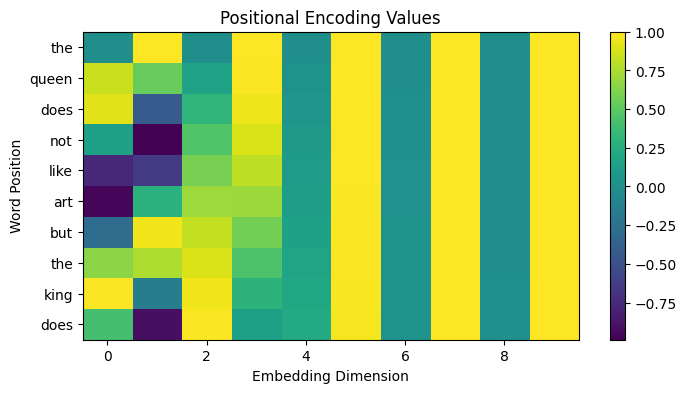

In [64]:
# Plot Positional Encodings to Show the Effect
plt.figure(figsize=(8, 4))
plt.imshow(transformer.positional_encoding.pe.squeeze().numpy(), cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Positional Encoding Values")
plt.xlabel("Embedding Dimension")
plt.ylabel("Word Position")

plt.yticks(ticks=range(len(sentence)), labels=sentence)
plt.show()

### vergelijken voor 'gelijkaardige' zinnen

In [66]:
sentences = [
    ["the", "cat", "sat", "on", "the", "mat"],
    ["on", "the", "mat", "sat", "the", "cat"],
    ["the", "mat", "was", "sat", "on", "by", "the", "cat"],
    ["sat", "on", "the", "mat", "the", "cat", "did"]
]

In [70]:
embedding_dim = model_small.vector_size
word_vectors = [torch.tensor([model_small.wv[word] for word in sentence if word in model_small.wv]) for sentence in sentences]
word_vectors = [wv.unsqueeze(0) for wv in word_vectors]

In [71]:
class TransformerWithAttention(nn.Module):
    def __init__(self, d_model):
        super(TransformerWithAttention, self).__init__()
        self.positional_encoding = PositionalEncoding(d_model)
        self.attention = nn.MultiheadAttention(embed_dim=d_model, num_heads=2, batch_first=True)
        self.fc = nn.Linear(d_model, d_model)

    def forward(self, x):
        x = self.positional_encoding(x)
        attn_output, _ = self.attention(x, x, x)  # Self-attention
        return self.fc(attn_output)



🚀 Sentence Variation 1: the cat sat on the mat


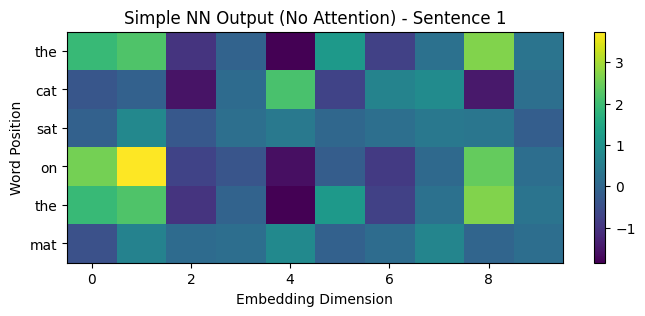

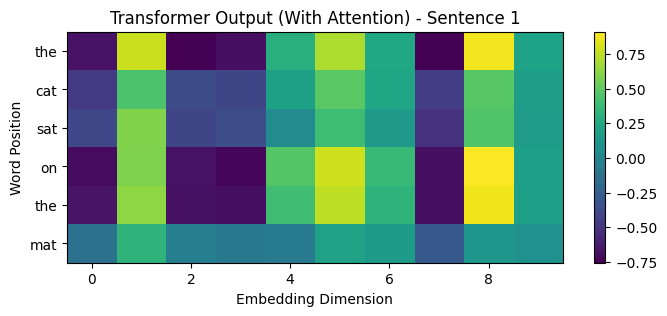


🚀 Sentence Variation 2: on the mat sat the cat


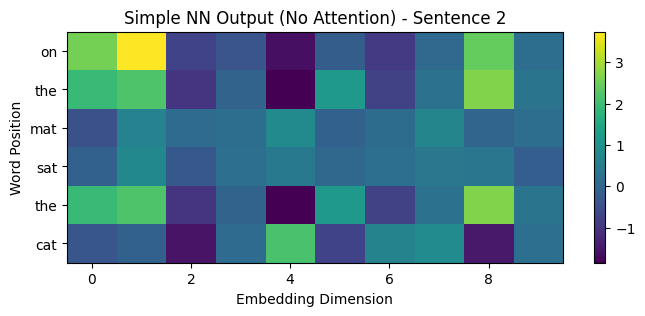

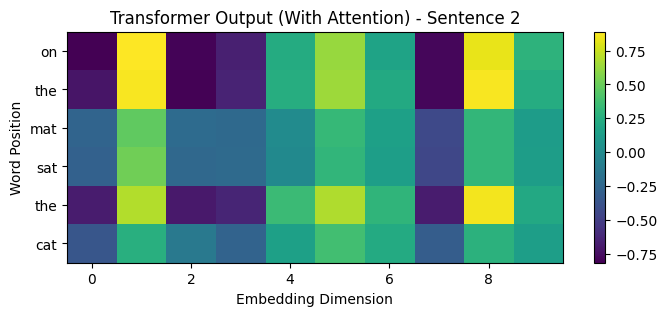


🚀 Sentence Variation 3: the mat was sat on by the cat


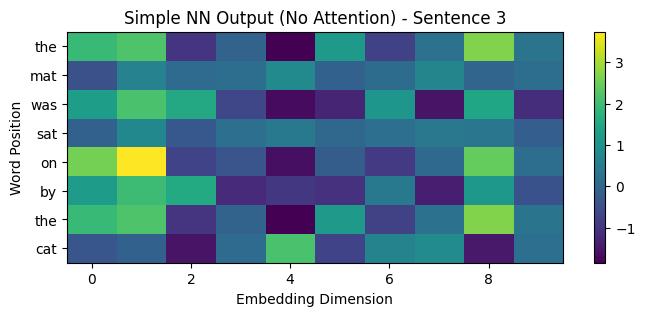

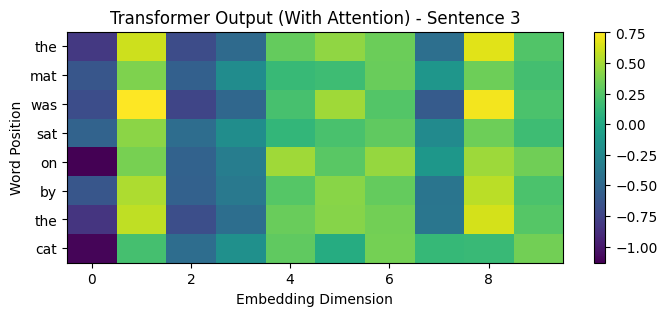


🚀 Sentence Variation 4: sat on the mat the cat did


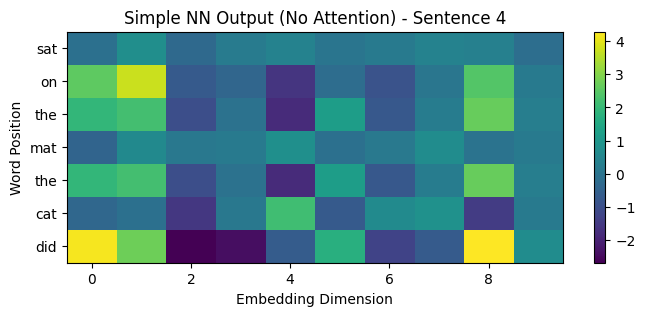

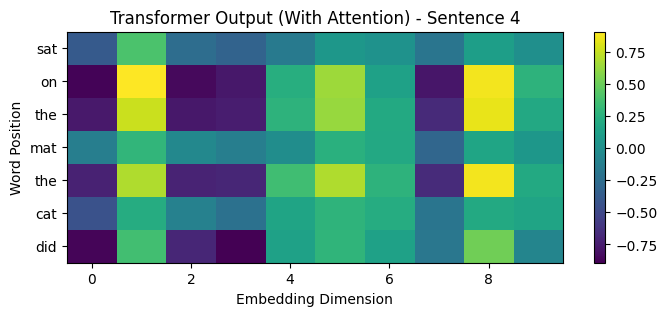

In [72]:
# Instantiate models
simple_nn = SimpleNN(embedding_dim)
transformer = TransformerWithAttention(d_model=embedding_dim)

# Pass sentences through both models
outputs_simple = [simple_nn(wv) for wv in word_vectors]  # No positional awareness
outputs_transformer = [transformer(wv) for wv in word_vectors]  # With self-attention

# Convert to numpy for visualization
outputs_simple_np = [out.squeeze().detach().numpy() for out in outputs_simple]
outputs_transformer_np = [out.squeeze().detach().numpy() for out in outputs_transformer]

# 🚀 Compare Differences in Outputs
def plot_sentence_embedding(sentence, embedding, title):
    plt.figure(figsize=(8, 3))
    plt.imshow(embedding, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Embedding Dimension")
    plt.ylabel("Word Position")
    plt.yticks(range(len(sentence)), labels=sentence)
    plt.show()

# Plot comparison for first sentence
for i, sentence in enumerate(sentences):
    print(f"\n🚀 Sentence Variation {i+1}: {' '.join(sentence)}")

    # Simple model output
    plot_sentence_embedding(sentence, outputs_simple_np[i], title=f"Simple NN Output (No Attention) - Sentence {i+1}")

    # Transformer output
    plot_sentence_embedding(sentence, outputs_transformer_np[i], title=f"Transformer Output (With Attention) - Sentence {i+1}")

# Transformers

In [ ]:
from transformers import pipeline

# Load a pre-trained GPT-2 model for text generation
generator = pipeline("text-generation", model="gpt2")

# Provide a real-world sentence
input_text = "Artificial Intelligence is changing the way we "

# Generate the next word(s)
output = generator(input_text, max_length=10, num_return_sequences=1)

# Print the predicted continuation
print("Predicted Completion:\n", output[0]["generated_text"])

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Predicted Completion:
 Artificial Intelligence is changing the way we  


In [10]:
output = generator(input_text, max_length=20, num_return_sequences=3, temperature=0.8)
for i, result in enumerate(output):
    print(f"Prediction {i+1}: {result['generated_text']}")

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Prediction 1: Artificial Intelligence is changing the way we  analyze the world. The world is changing because
Prediction 2: Artificial Intelligence is changing the way we �� we live through technology, and I think you will
Prediction 3: Artificial Intelligence is changing the way we ute that the world works, which is why it's


# LLM's

In [ ]:
import ollama

response = ollama.chat(model="mistral", messages=[{"role": "user", "content": "Wat is AI?"}])
print(response['message']['content'])
